## Binary Tree

### Introduction
* From graph view, a tree can be defined as a directed acyclic graph which has N nodes and N-1 edges
* A binary tree is a tree data structure in which each node has at most two children, which are referred to as the left child and the right child.

### Traverse a Tree
* time complexity
  + O(N) since we traverse every node
* space complexity
  + O(N) in worst case. Should be the depth of the tree

#### Pre-order traversal
* pre-order traversal is to visit the root first, then traverse the left, and then right subtrees
* Algorithm
  + recursive
    + add the current node value to result
    + if node.left, recursively call traverse(node.left)
    + if node.right, recursively call traverse(node.right)
  + iterative
    + initialize a stack with root stored in the stack
    + while stack
      + pop the stack and append the value to result
      + if node.right, append it to stack
      + if node.left, append it to stack
    + return rs 

In [5]:
from typing import List, Optional

# recursive implementation of pre-order traversal

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:
    def preorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if root is None:
            return None
        
        rs =[]
        
        def traverse(node: Optional[TreeNode]) -> None:
            rs.append(node.val)
                
            if node.left:
                traverse(node.left)
                
            if node.right:
                traverse(node.right)
                
        traverse(root)
        
        return rs
    
# iterative implementation of pre-order traversal

from typing import List

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def preorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if root is None:
            return None
        
        rs =[]
        stack = [root]
        
        while stack:
            node = stack.pop()
            rs.append(node.val)
            
            if node.right:
                stack.append(node.right)
                
            if node.left:
                stack.append(node.left)
        
        
        return rs

#### In-order traversal
* In-order traversal is to traverse the left subtree first. Then visit the root. Finally, traverse the right subtree
* Typically, for binary search tree, we can retrieve all the data in sorted order using in-order traversal.
* Algorithm
  + recursive implementaion
    + if node.left, recursively call node.left
    + append the node.val to the result
    + if node.right, recursively call node.right
  + iterative implementation
    + initialize stack =\[root\] and curr = None
    + while root or curr:
      + while curr:
        + stack.append(curr)
        + curr = curr.left
      + curr = stack.pop(), rs.append(curr.val)
      + curr = curr.right
    + return rs   

In [6]:
from typing import List, Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
# recursive implementation of in-order traversal

class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if root is None:
            return None
        
        rs = []
        
        def traverse(node: TreeNode) -> None:
            if node.left:
                traverse(node.left)
                
            rs.append(node.val)
            
            if node.right:
                traverse(node.right)
                
        traverse(root)
        return rs

# iterative implemenation of in-order traversal
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if root is None:
            return None
        
        rs = []
        
        stack = []
        curr = root
        
        while stack or curr: 
            # traverse the left branch
            while curr:
                stack.append(curr)
                curr = curr.left
                
            # if we have reached the end of the left branch
            # pop and store the left child
            curr = stack.pop()
            rs.append(curr.val)
            
            # traverse the right and push to stack
            curr = curr.right
        
        return rs             

#### Post-order traversal
* Post-order traversal is to traverse the left subtree first. Then traverse the right subtree. Finally, visit the root.
* When you delete nodes in a tree, deletion process will be in post-order. 
  + You will delete its left child and its right child before you delete the node itself.
  + post-order is widely used in mathematical expressions. It is easier to write a program to parse a post-order expression.
  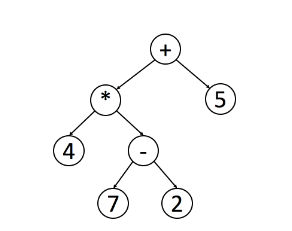
    + You can easily figure out the original expression using the inorder traversal. However, it is not easy for a program to handle this expression since you have to check the priorities of operations.

In [7]:
# iterative implementation of post-order traversal

from typing import Optional, List

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return None
        
        rs = deque()
        stack = [root]
        
        while stack:
            # pop the root and insert to the head of results
            # then push left and right child
            # the order from the end to head in results will
            # be root, right and left. From head to end
            # will be left, right and root
            curr = stack.pop()
            rs.appendleft(curr.val)
            
            # push left child first
            if curr.left:
                stack.append(curr.left)
                
            if curr.right:
                stack.append(curr.right)
                
        return rs 
    
# recursive implementation of post-order traversal

class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return None
        
        rs = []        
        
        def traverse(node: TreeNode) -> None:
            if node.left:
                traverse(node.left)
                
            if node.right:
                traverse(node.right)
                
            rs.append(node.val)   
            
        traverse(root)
        return rs                     

#### Level-order traversal
* Level-order traversal is to traverse the tree level by level
* Breadth-First Search is an algorithm to traverse or search in data structures like a tree or a graph. The algorithm starts with a root node and visit the node itself first. Then traverse its neighbors, traverse its second level neighbors, traverse its third level neighbors, so on and so forth.
* Typically, we use a queue to help us to do BFS
* Algorithm
  + use deque 
  + while q
    + tmp = \[\]
    + for i in range(len(q))
      + curr = q.popleft(), tmp.append(curr)
      + if curr.left, q.append(curr.left)
      + if curr.right, q.append(curr.right)
    + rs.append(tmp)
  + return rs
* time complexity 
  + O(N)
* space complexity
  + O(N)

In [8]:
from collections import deque
from typing import List, Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root:
            return []
        
        q = deque([root])
        rs = []
        
        while q:
            tmp = []
            for i in range(len(q)):
                node = q.popleft()
                tmp.append(node.val)
                
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
                    
            rs.append(tmp)
            
        return rs    

### Solving Tree Problems Recursively
* Top down
  + in each recursive call, we will visit the node first to come up with some values, and pass these values to its children when calling the function recursively
  + can be considered as a kind of preorder traversal
* Bottom up
  + In each recursive call, we will firstly call the function recursively for all the children nodes and then come up with the answer according to the returned values and the value of the current node itself.
  + This process can be regarded as a kind of postorder traversal
* choose top down or bottom up
  + top down
    + Can you determine some parameters to help the node know its answer?
      + this is important since the final answer will be given by leaf nodes
    + Can you use these parameters and the value of the node itself to determine what should be the parameters passed to its children?
  + bottom up
    + for a node in a tree, if you know the answer of its children, can you calculate the answer of that node?
      + this is important since the final answer will be given by the root node